In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
import joblib

<h2 id="multiple_regression_model">Multiple Regression Model With Raw Data</h2>

In [2]:
dfMC=pd.read_csv("../Data/HouseImformation.csv")

In [3]:
dfMC.head(6)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33


In [4]:
dfMC["Area"]=dfMC["Area"].str.replace(',','').astype(float)

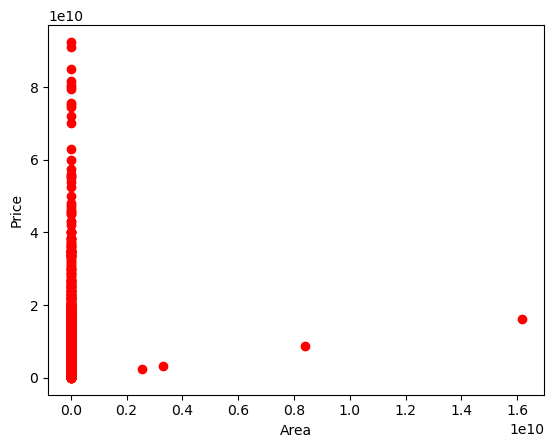

In [5]:
plt.scatter(dfMC["Area"],dfMC["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [6]:
iso=IsolationForest(contamination=0.001)
dfMC["OuterRow"] = iso.fit_predict(dfMC[["Area"]])

print(dfMC["OuterRow"].value_counts())

OuterRow
 1    3475
-1       4
Name: count, dtype: int64


In [7]:
dfMC[dfMC["OuterRow"] == -1]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),OuterRow
570,3.310000e+09,2,True,True,True,Ostad Moein,3.310000e+09,110333.33,-1
709,1.616000e+10,3,True,True,True,Pasdaran,1.616000e+10,538666.67,-1
1604,8.400000e+09,2,True,True,True,Gheitarieh,8.700000e+09,290000.00,-1
2802,2.550000e+09,2,True,True,True,Central Janatabad,2.550000e+09,85000.00,-1


In [8]:
dfMC=dfMC.drop(index=dfMC[dfMC["OuterRow"] == -1].index)

In [9]:
print(dfMC.isna().sum())

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
OuterRow       0
dtype: int64


In [10]:
dfMC=dfMC.dropna()

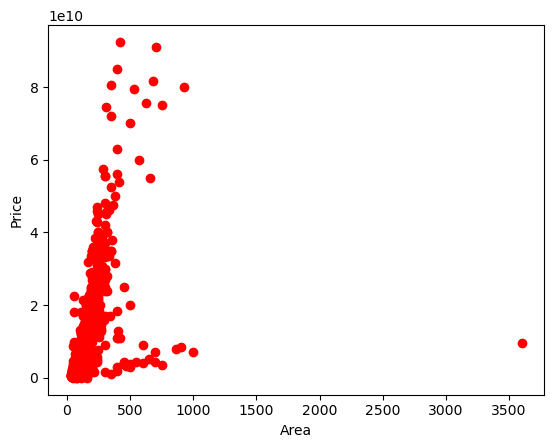

In [11]:
plt.scatter(dfMC["Area"],dfMC["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [12]:
MeanPriceAddress=dfMC.groupby("Address")["Price"].mean()
dfMC["MeanPriceA"] = dfMC["Address"].map(MeanPriceAddress)

In [13]:
mask= np.random.rand(len(dfMC)) < 0.8

train=dfMC[mask]
test=dfMC[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [14]:
multiReg = linear_model.LinearRegression()

multiReg.fit(x_train,y_train)

y_predict=multiReg.predict(x_test)


print(multiReg.coef_)
print("R2-score: %.2f" % r2_score(y_test , y_predict))


[[ 1.71930928e+07  2.21689548e+09 -1.72126049e+08  1.21160348e+08
  -5.35252554e+08  7.56148728e-01]]
R2-score: 0.63


In [15]:
joblib.dump(multiReg, '../Models/LinearRegMiniCleanModel.pkl')

['../Models/LinearRegMiniCleanModel.pkl']

<h2 id="multiple_regression_model">Multiple Regression Model WithOut Outer Data</h2>

In [16]:
dfOuter=pd.read_csv("../Data/HouseImformation.csv")

In [17]:
dfOuter['Area'] = dfOuter['Area'].str.replace(',', '').astype(float)

In [18]:
dfOuter=dfOuter.dropna()

In [19]:
isoOuter=IsolationForest(contamination=0.01)
dfOuter['OuterData']=isoOuter.fit_predict(dfOuter[["Area", "Price"]])

In [20]:
print(dfOuter['OuterData'].value_counts())

OuterData
 1    3421
-1      35
Name: count, dtype: int64


In [21]:
dfOuter=dfOuter.drop(index=dfOuter[dfOuter['OuterData'] == -1].index)

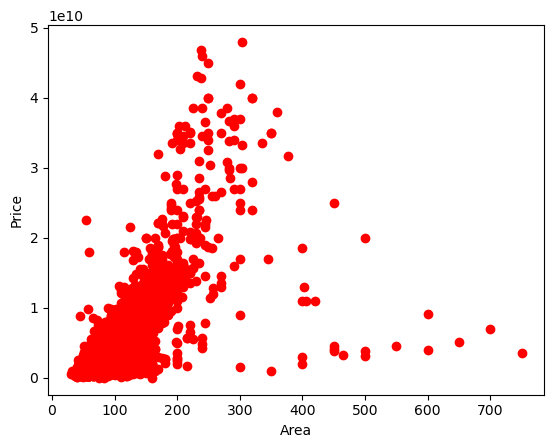

In [22]:
plt.scatter(dfOuter["Area"],dfOuter["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [23]:
MeanPriceAddressOuter=dfOuter.groupby("Address")["Price"].mean()
dfOuter["MeanPriceA"] = dfOuter["Address"].map(MeanPriceAddressOuter)

In [24]:
mask= np.random.rand(len(dfOuter)) < 0.8

train=dfOuter[mask]
test=dfOuter[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [25]:
multiReg = linear_model.LinearRegression()

multiReg.fit(x_train,y_train)

y_predict=multiReg.predict(x_test)


print(multiReg.coef_)
print("R2-score: %.2f" % r2_score(y_test , y_predict))

[[ 3.66443128e+07  8.37738246e+08 -4.54081864e+08  3.50124818e+08
   2.58547135e+08  7.42960452e-01]]
R2-score: 0.76


In [26]:
joblib.dump(multiReg, '../Models/LinearRegCleanedModel.pkl')

['../Models/LinearRegCleanedModel.pkl']

<h2 id="multiple_regression_model">Multiple Regression Model with Raw Data</h2>

In [27]:
dfRaw=pd.read_csv("../Data/HouseImformation.csv")

In [37]:
dfRaw=dfRaw.dropna()
dfRaw['Area'] = dfRaw['Area'].str.replace(',', '').astype(float)

In [38]:
MeanPriceAddressRaw=dfRaw.groupby("Address")["Price"].mean()
dfRaw["MeanPriceA"] = dfRaw["Address"].map(MeanPriceAddressRaw)

In [39]:
mask= np.random.rand(len(dfRaw)) < 0.8

train=dfRaw[mask]
test=dfRaw[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [40]:
multiReg = linear_model.LinearRegression()

multiReg.fit(x_train,y_train)

y_predict=multiReg.predict(x_test)


print(multiReg.coef_)
print("R2-score: %.2f" % r2_score(y_test , y_predict))

[[ 2.76115915e-01  3.33097499e+09 -2.37465252e+08 -3.10932673e+08
  -7.07963237e+08  8.11705788e-01]]
R2-score: 0.57


In [41]:
joblib.dump(multiReg, '../Models/LinearRegRawDataModel.pkl')

['../Models/LinearRegRawDataModel.pkl']